In [7]:
import pandas as pd
import datetime
import json

In [8]:
def extract_data(json_data):
    result = []
    for post in json_data['posts']:
        if 'text' in post:
            record = {
                "board": post["post_metadata"]["source"]["board"],
                "site": post["post_metadata"]["source"]["site"],
                "text": post["text"],
                "time": datetime.datetime.fromtimestamp(post["post_metadata"]['time'])
            }

        result.append(record)
    return result
JSON_PATH = "/Users/vaibhavnakrani/calel/QAnon-posts.json"
with open(JSON_PATH, "r") as f:
    data = json.load(f)

extracted_data = extract_data(data)

df1 = pd.DataFrame(extracted_data)

In [18]:
df1['timestamp'] = pd.to_datetime(df1['time'])

df1 = df1.filter(['timestamp','text'])

In [50]:
df2 = pd.read_csv('/Users/vaibhavnakrani/calel/Data/qanon tweets 20_21/datasets/QAnon tweets.csv',
                           on_bad_lines='skip',encoding='latin1')

df2 = df2.iloc[:,:18]

df2['timestamp'] = pd.to_datetime(df2['created_at'], format='%a %b %d %H:%M:%S %z %Y', errors='coerce')
df2['timestamp'] = df2['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

df2 = df2.filter(['timestamp','text'])

/var/folders/77/7_fbgxvs6_g1_490bphl4hbm0000gn/T/ipykernel_83039/3168668701.py:1: DtypeWarning: Columns (5,6,10,14,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Users/vaibhavnakrani/calel/Data/qanon tweets 20_21/datasets/QAnon tweets.csv',


In [28]:
df3 = pd.read_csv('/Users/vaibhavnakrani/calel/Data/Qanon_oct_2017_nov_2018/qanon_4chan.csv')
df3['timestamp'] = pd.to_datetime(df3['unix_timestamp'], unit='s')
df3.rename(columns={'body':'text'},inplace=True)
df3 = df3.filter(['timestamp','text'])

In [48]:
df3.head()

,timestamp,text
0,2017-10-28 00:25:59,>>146934202\n\nHow many Qn will fit into Qm fo...
1,2017-10-28 02:55:21,>>146946694\nIdentical twins are not 100% iden...
2,2017-10-28 07:00:00,"Q Thanks, Sarah. Obviously, sexual harassment ..."
3,2017-10-28 09:25:16,>>146963402\nFuck yea! S H R I K E S Q U A D
4,2017-10-28 15:39:36,>>147001389\n>and what's Dugin's REAL endgame?...


In [31]:
df4 = pd.read_csv('/Users/vaibhavnakrani/calel/Data/Qanon_oct_2017_nov_2018/qanon_8chan.csv')
df4['timestamp'] = pd.to_datetime(df4['unix_timestamp'], unit='s')
df4.rename(columns={'body':'text'},inplace=True)
df4 = df4.filter(['timestamp','text'])

In [34]:
df5 = pd.read_csv('/Users/vaibhavnakrani/calel/Data/Qanon_oct_2017_nov_2018/qanon_reddit.csv')
df5['timestamp'] = pd.to_datetime(df5['unix_timestamp'], unit='s')
df5.rename(columns={'body':'text'},inplace=True)
df5 = df5.filter(['timestamp','text'])

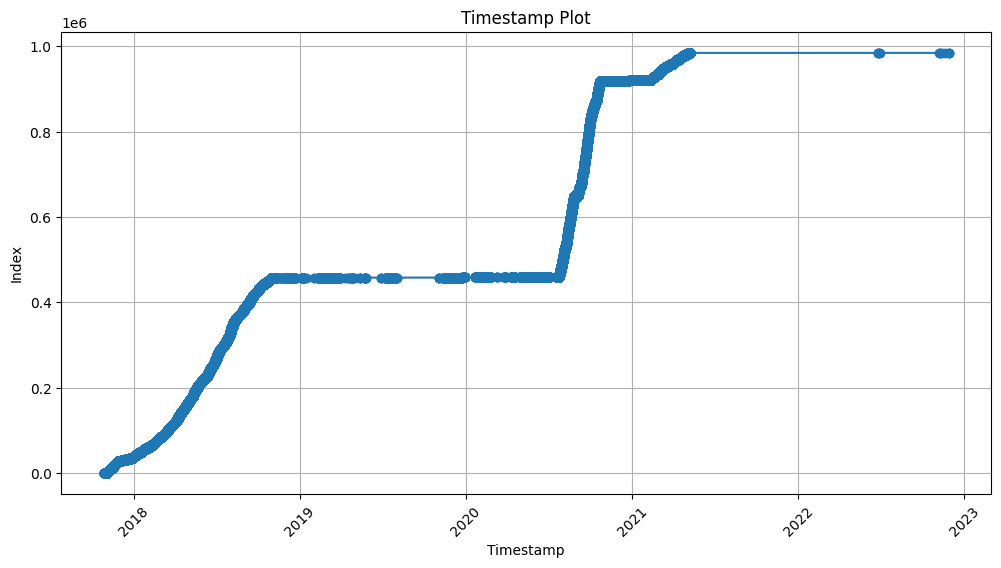

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# List of DataFrames
dataframes = [df1, df2, df3, df4, df5]

# Merge the DataFrames
merged_df = pd.concat(dataframes, ignore_index=True)

# Format the timestamp uniformly
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'])

# Sort the DataFrame by timestamp
merged_df = merged_df.sort_values('timestamp')

# Plot the timestamp
plt.figure(figsize=(12, 6))
plt.plot(merged_df['timestamp'], range(len(merged_df)), marker='o')
plt.xlabel('Timestamp')
plt.ylabel('Index')
plt.title('Timestamp Plot')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [54]:
merged_df = merged_df[merged_df['timestamp'].dt.year < 2022]

986298
984954


In [56]:
merged_df.columns

Index(['timestamp', 'text'], dtype='object')

In [55]:
merged_df.to_csv('final_df.csv',index = False)